In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, top_k_accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('new_data.csv')
print(df.head())
print(df.columns)

   Drawing  Dancing  Singing  Sports  Video Game  Acting  Travelling  \
0        0        0        0       0           0       0           0   
1        0        0        0       0           0       0           0   
2        0        0        0       0           0       0           0   
3        0        0        0       0           0       0           0   
4        0        0        0       0           0       0           0   

   Gardening  Animals  Photography  ...  Engeeniering  Doctor  Pharmisist  \
0          0        0            0  ...             0       0           0   
1          0        0            0  ...             0       0           0   
2          0        0            0  ...             0       0           0   
3          0        0            0  ...             0       0           0   
4          0        0            0  ...             0       0           0   

   Cycling  Knitting  Director  Journalism  Bussiness  Listening Music  \
0        0         0         1

In [7]:
print(df.shape)

(3535, 60)


In [8]:
print(df.dtypes)

Drawing                    int64
Dancing                    int64
Singing                    int64
Sports                     int64
Video Game                 int64
Acting                     int64
Travelling                 int64
Gardening                  int64
Animals                    int64
Photography                int64
Teaching                   int64
Exercise                   int64
Coding                     int64
Electricity Components     int64
Mechanic Parts             int64
Computer Parts             int64
Researching                int64
Architecture               int64
Historic Collection        int64
Botany                     int64
Zoology                    int64
Physics                    int64
Accounting                 int64
Economics                  int64
Sociology                  int64
Geography                  int64
Psycology                  int64
History                    int64
Science                    int64
Bussiness Education        int64
Chemistry 

In [9]:
print(df.isnull().sum().sum())

0


In [22]:
print(df['Courses'].unique())
print(len(df['Courses'].unique()))

['BBA- Bachelor of Business Administration'
 'BEM- Bachelor of Event Management' 'Integrated Law Course- BA + LL.B'
 'BJMC- Bachelor of Journalism and Mass Communication'
 'BFD- Bachelor of Fashion Designing' 'BBS- Bachelor of Business Studies'
 'BTTM- Bachelor of Travel and Tourism Management'
 'BVA- Bachelor of Visual Arts' 'BA in History'
 'B.Arch- Bachelor of Architecture'
 'BCA- Bachelor of Computer Applications' 'B.Sc.- Information Technology'
 'B.Sc- Nursing' 'BPharma- Bachelor of Pharmacy'
 'BDS- Bachelor of Dental Surgery' 'Animation, Graphics and Multimedia'
 'B.Sc- Applied Geology' 'B.Sc.- Physics' 'B.Sc. Chemistry'
 'B.Sc. Mathematics' 'B.Tech.-Civil Engineering'
 'B.Tech.-Computer Science and Engineering'
 'B.Tech.-Electronics and Communication Engineering'
 'B.Tech.-Electrical and Electronics Engineering'
 'B.Tech.-Mechanical Engineering' 'B.Com- Bachelor of Commerce'
 'BA in Economics' 'CA- Chartered Accountancy' 'CS- Company Secretary'
 'Diploma in Dramatic Arts' 'MBBS'

Course distribution:

Courses
BBS- Bachelor of Business Studies                      111
BBA- Bachelor of Business Administration               101
BA in Economics                                        101
B.Tech.-Civil Engineering                              101
B.Tech.-Computer Science and Engineering               101
B.Tech.-Electronics and Communication Engineering      101
B.Tech.-Electrical and Electronics Engineering         101
B.Tech.-Mechanical Engineering                         101
B.Com- Bachelor of Commerce                            101
CA- Chartered Accountancy                              101
B.Sc. Chemistry                                        101
CS- Company Secretary                                  101
Diploma in Dramatic Arts                               101
MBBS                                                   101
Civil Services                                         101
BA in English                                          101
BA in Hindi               

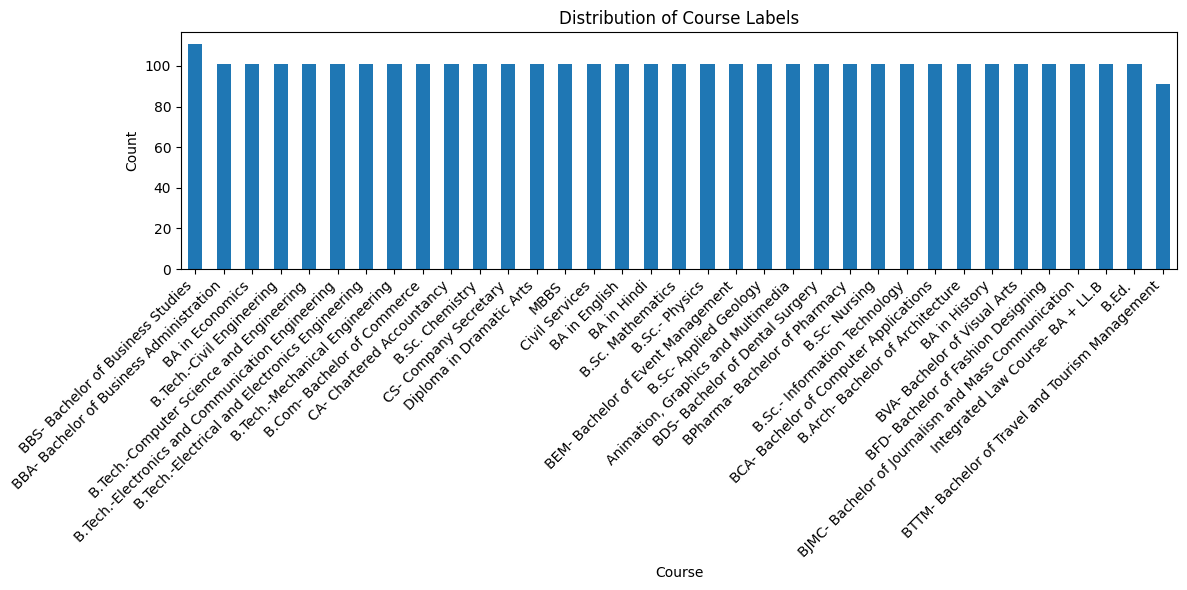

In [11]:
# Count values in the 'Courses' column
course_counts = df['Courses'].value_counts()

# Print counts and percentages
print("Course distribution:\n")
print(course_counts)
print("\nPercentage distribution:\n")
print(course_counts / len(df) * 100)

# Visualize the distribution
plt.figure(figsize=(12, 6))
course_counts.plot(kind='bar')
plt.title('Distribution of Course Labels')
plt.xlabel('Course')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [12]:
# Separate features and target
X = df.drop(columns=['Courses'])
y = df['Courses']

# Encode target labels (e.g., strings to integers)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Random Forest

                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        20
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        20
                        B.Com- Bachelor of Commerce       1.00      0.90      0.95        20
                                              B.Ed.       1.00      1.00      1.00        20
                              B.Sc- Applied Geology       1.00      1.00      1.00        20
                                      B.Sc- Nursing       1.00      1.00      1.00        20
                                    B.Sc. Chemistry       1.00      1.00      1.00        21
                                  B.Sc. Mathematics       1.00      1.00      1.00        21
                      B.Sc.- Information Technology       1.00      1.00      1.00        20
                                     B.Sc.- Physics       1.00      1

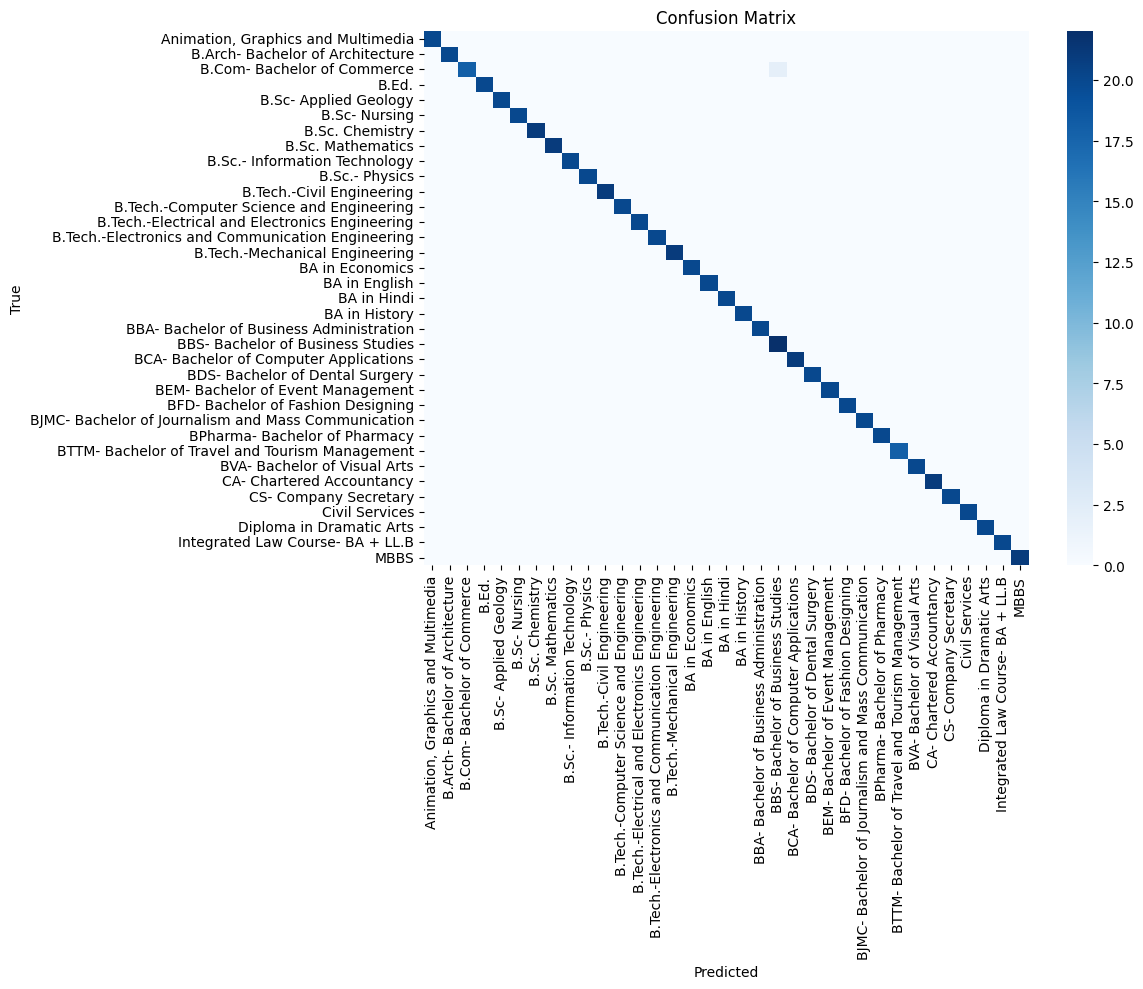

In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False, cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

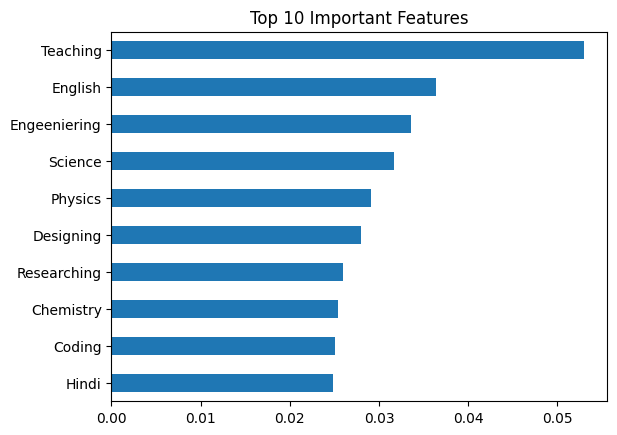

In [14]:
# feature importance
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().tail(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()


# XGBoost

In [15]:
import xgboost as xgb

# Train XGBoost
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=len(le.classes_), eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Predict and report
y_pred = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


XGBoost Classification Report:
                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        20
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        20
                        B.Com- Bachelor of Commerce       1.00      0.90      0.95        20
                                              B.Ed.       1.00      1.00      1.00        20
                              B.Sc- Applied Geology       1.00      1.00      1.00        20
                                      B.Sc- Nursing       1.00      1.00      1.00        20
                                    B.Sc. Chemistry       1.00      1.00      1.00        21
                                  B.Sc. Mathematics       1.00      1.00      1.00        21
                      B.Sc.- Information Technology       1.00      1.00      1.00        20
                                     B

# Tensorflow neural networks

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [17]:
# One-hot encode target
y_categorical = to_categorical(y_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
)

# Build model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Neural Net Test Accuracy: {test_acc:.4f}")

# Predict & Report
y_pred_nn = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Neural Net Classification Report:")
print(classification_report(y_true, y_pred_nn, target_names=le.classes_))


c:\Users\user\OneDrive\Documents\AmTech\Git Project\study-engine\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2507 - loss: 3.1426 - val_accuracy: 0.9505 - val_loss: 0.8607
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8738 - loss: 0.8156 - val_accuracy: 0.9929 - val_loss: 0.1279
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.2650 - val_accuracy: 0.9965 - val_loss: 0.0544
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9668 - loss: 0.1673 - val_accuracy: 0.9965 - val_loss: 0.0304
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9758 - loss: 0.1202 - val_accuracy: 0.9965 - val_loss: 0.0220
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0767 - val_accuracy: 0.9965 - val_loss: 0.0180
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.0727 - val_accuracy: 0.9965 - val_loss: 0.0170
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9873 - loss: 0.0553 - val_accuracy: 0.

In [18]:
# Get predicted probabilities
y_pred_probs = model.predict(X_test)

# Get Top-3 Accuracy
y_true = np.argmax(y_test, axis=1)
top3_acc = top_k_accuracy_score(y_true, y_pred_probs, k=3)
print(f"Neural Net Top-3 Accuracy: {top3_acc:.4f}")

# Get predicted classes (for classification report)
y_pred_nn = np.argmax(y_pred_probs, axis=1)

print("Neural Net Classification Report:")
print(classification_report(y_true, y_pred_nn, target_names=le.classes_))

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Neural Net Top-3 Accuracy: 1.0000
Neural Net Classification Report:
                                                     precision    recall  f1-score   support

                 Animation, Graphics and Multimedia       1.00      1.00      1.00        20
                   B.Arch- Bachelor of Architecture       1.00      1.00      1.00        20
                        B.Com- Bachelor of Commerce       1.00      0.90      0.95        20
                                              B.Ed.       1.00      1.00      1.00        20
                              B.Sc- Applied Geology       1.00      1.00      1.00        20
                                      B.Sc- Nursing       1.00      1.00      1.00        20
                                    B.Sc. Chemistry       1.00      1.00      1.00        21
                                  B.Sc. Mathematics       1.00      1.00      1.00        21
                      B.Sc.- Information Technology   